In [1]:
import tensorflow
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras.applications.vgg16 import VGG16
from PIL import Image

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [5]:
# load vgg model

# load the model
model = VGG16()
# summarize the model
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
553467904/553467096 [==============================] - 33s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_

In [8]:
# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
     if 'conv' not in layer.name:
         continue

In [9]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [11]:
# summarize filters in each convolutional layer
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [12]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [13]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

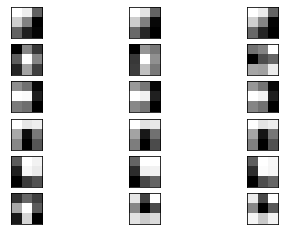

In [14]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

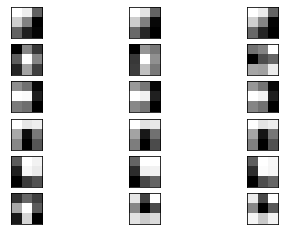

In [16]:
# cannot easily visualize filters lower down
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [19]:
# summarize feature map size for each conv layer
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


In [27]:
# redefine model to output right after the first hidden layer
model = tensorflow.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [28]:
# load the image with the required shape
from tensorflow.keras.preprocessing.image import load_img

img = load_img('protea.jpg', target_size=(224, 224))

In [33]:
from tensorflow.keras.preprocessing.image import img_to_array

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [35]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [36]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

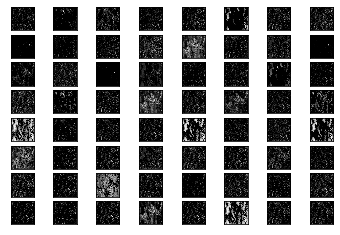

In [37]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


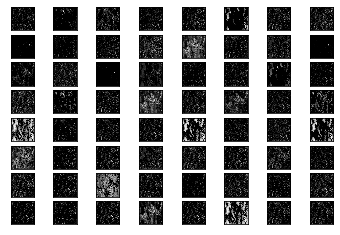

In [40]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('protea.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

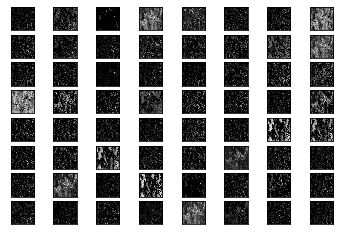

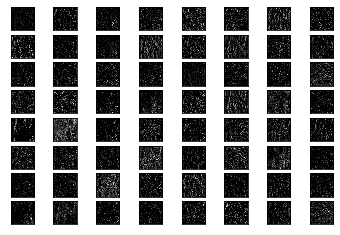

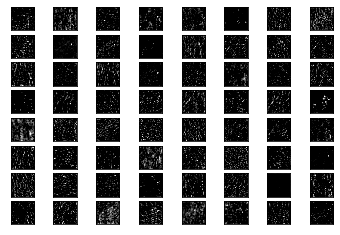

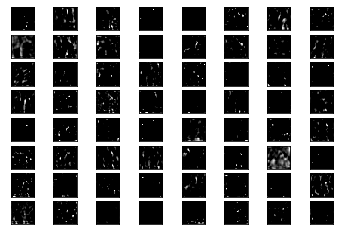

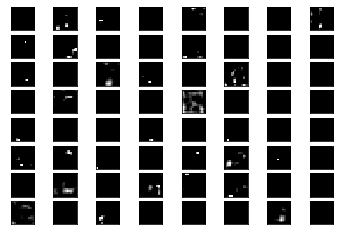

In [43]:
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('protea.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [2]:


def split_rgb_channels(image_path):
    # Load the image
    img = Image.open(image_path)

    # Split the image into R, G, B channels
    r, g, b = img.split()

    # Save each channel as a separate image
    r.save("Red_Channel.png")
    g.save("Green_Channel.png")
    b.save("Blue_Channel.png")

    return "Red_Channel.png", "Green_Channel.png", "Blue_Channel.png"

# Example usage:
# Assuming you have an image file named 'example.jpg' in the current directory
# red_path, green_path, blue_path = split_rgb_channels("example.jpg")
# This will create three images named 'Red_Channel.png', 'Green_Channel.png', and 'Blue_Channel.png'

split_rgb_channels('protea.jpg')


('Red_Channel.png', 'Green_Channel.png', 'Blue_Channel.png')

[[126 127 126 ...  20  21  21]
 [129 127 126 ...  21  21  21]
 [131 127 126 ...  21  21  21]
 ...
 [ 62  64  65 ... 132 130 127]
 [ 65  64  65 ... 134 132 129]
 [ 62  63  64 ... 136 134 133]]


In [5]:
from PIL import Image
import numpy as np
import sys

# Increase the numpy print threshold to ensure the full array is printed
np.set_printoptions(threshold=sys.maxsize)

# Load an image
image_path = 'protea.jpg'  # Replace with your image path
image = Image.open(image_path)

# Optionally resize the image if it's too large
image = image.resize((10, 10))  # Resize to 50x50 for demonstration

# Convert the image to grayscale (optional, for simplicity)
image_gray = image.convert('L')

# Convert the image to a numpy array
image_array = np.array(image_gray)

# Print the array
print(image_array)

[[ 71  48  76 131 146  67  96 138  69  96]
 [ 99  99  63 139 150  65  86 116  79 138]
 [ 66  68  50 146 157 140 119  91  72 115]
 [ 98  41 104 127 144 138 167  82  65  94]
 [128  30 100  94 129 139 168 138 107  73]
 [125  43 127  92 110 142 114 133 119  64]
 [140 147 165 127 102 134  94 109  96  90]
 [119 153 143 119 102 133  88 117 101  66]
 [110  80 125 121 124 134 104 120  81  41]
 [106  36  93 126 125 133  99 105  60  49]]


In [2]:
import os

# Replace with your dataset root directory
dataset_directory = r"C:\Users\Jarushen\Desktop\Masters Thesis\Images\Fynbos_Dataset_B"

# Dictionary to hold the species names and corresponding image counts
species_image_count = {}

# Iterate over the subdirectories in the dataset directory
for species_name in os.listdir(dataset_directory):
    # Construct the path to the species directory
    species_path = os.path.join(dataset_directory, species_name)
    
    # Ensure that the path is a directory to avoid counting files
    if os.path.isdir(species_path):
        # List all files in the species directory
        images = os.listdir(species_path)
        
        # Count the number of image files, assuming all files in the directory are images
        image_count = len([image for image in images if os.path.isfile(os.path.join(species_path, image))])
        
        # Add the species name and image count to the dictionary
        species_image_count[species_name] = image_count

# Print the species names and the number of images for each
for species, count in species_image_count.items():
    print(f"Species: {species}, Image Count: {count}")

Species: Aloe arborescens, Image Count: 35
Species: Aristea capitata, Image Count: 21
Species: Baloskion tetraphyllum, Image Count: 23
Species: Carpobrotus edulis, Image Count: 25
Species: Cotyledon orbiculata, Image Count: 48
Species: Curio talinoides, Image Count: 42
Species: Erica arborescens, Image Count: 30
Species: Erica cinerea, Image Count: 37
Species: Erica discolor, Image Count: 33
Species: Helichrysum petiolare, Image Count: 57
Species: Leucadendron argenteum, Image Count: 53
Species: Leucadendron laureolum, Image Count: 37
Species: Leucadendron salignum, Image Count: 39
Species: Melianthus major, Image Count: 52
Species: Mutisia orbignyana, Image Count: 13
Species: Oscularia deltoides, Image Count: 60
Species: Osyris lanceolata, Image Count: 17
Species: Ozothamnus leptophyllus, Image Count: 19
Species: Pelargonium crispum, Image Count: 30
Species: Protea cynaroides, Image Count: 75
Species: Protea neriifolia, Image Count: 50
Species: Protea repens, Image Count: 41
Species: 

In [8]:
species_image_count

{'Aloe arborescens': 35,
 'Arctotis stoechadifolia': 23,
 'Aristea capitata': 21,
 'Baloskion tetraphyllum': 23,
 'Carpobrotus chilensis': 27,
 'Carpobrotus edulis': 25,
 'Cotyledon orbiculata': 48,
 'Curio talinoides': 42,
 'Erica arborescens': 30,
 'Erica cinerea': 37,
 'Erica discolor': 33,
 'Erica duthieae': 16,
 'Erica perspicua': 26,
 'Gazania rigens': 28,
 'Grevillea banksii': 41,
 'Helichrysum petiolare': 57,
 'Leucadendron argenteum': 53,
 'Leucadendron laureolum': 37,
 'Leucadendron salignum': 39,
 'Leucospermum cordifolium': 54,
 'leucospermum oleifolium': 51,
 'Lithospermum ruderale': 11,
 'Melianthus major': 52,
 'Mountain Fynbos': 18,
 'Mutisia orbignyana': 13,
 'Oscularia deltoides': 60,
 'Osyris lanceolata': 17,
 'Ozothamnus leptophyllus': 19,
 'Pelargonium crispum': 30,
 'Protea aurea': 34,
 'Protea cynaroides': 75,
 'Protea neriifolia': 50,
 'Protea pepens': 41,
 'Schoenoplectus californicus': 10,
 'Strelitzia reginae': 55}

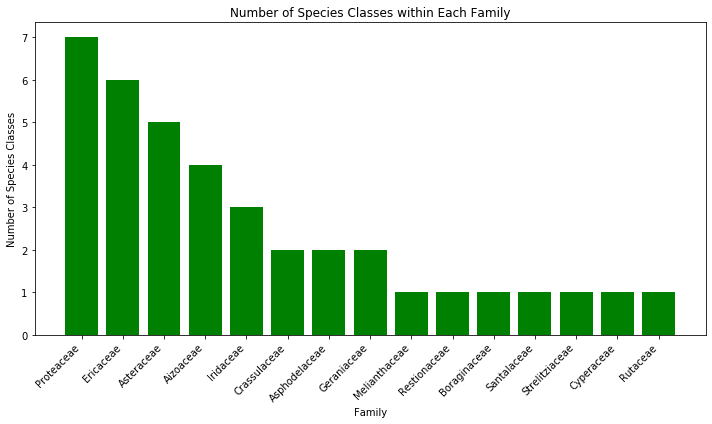

In [11]:
# Python code to create a histogram based on the LaTeX table data
import matplotlib.pyplot as plt

# Data extracted from the LaTeX table
families = [
    "Proteaceae", "Ericaceae", "Asteraceae", "Aizoaceae", "Iridaceae",
    "Crassulaceae", "Asphodelaceae", "Geraniaceae", "Melianthaceae",
    "Restionaceae", "Boraginaceae", "Santalaceae", "Strelitziaceae", "Cyperaceae", "Rutaceae"
]
species_classes_counts = [7, 6, 5, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(families, species_classes_counts, color='green')
plt.title('Number of Species Classes within Each Family')
plt.xlabel('Family')
plt.ylabel('Number of Species Classes')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


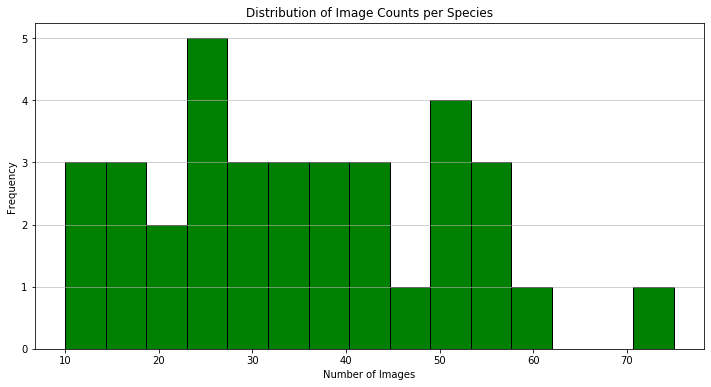

In [14]:
import os
from PIL import Image

# Assuming the dataset is structured with a root folder containing subfolders for each species
dataset_directory = r"C:\Users\Jarushen\Desktop\Masters Thesis\Images\Fynbos"  # Replace with the path to your dataset

# Function to check if an image file is corrupted
def is_image_corrupted(image_path):
    try:
        img = Image.open(image_path)  # Open the image file
        img.verify()  # Verify that it is an image
        return False
    except (IOError, SyntaxError):
        return True

# Dictionary to hold the species names and corresponding count of corrupted files
corrupted_files_count = {}

# Iterate over the subdirectories in the dataset directory
for species_name in os.listdir(dataset_directory):
    species_path = os.path.join(dataset_directory, species_name)
    if os.path.isdir(species_path):
        corrupted_count = 0
        for image_file in os.listdir(species_path):
            image_path = os.path.join(species_path, image_file)
            if is_image_corrupted(image_path):
                corrupted_count += 1
        corrupted_files_count[species_name] = corrupted_count

# Print the species names and the count of corrupted files
for species, count in corrupted_files_count.items():
    print(f"Species: {species}, Corrupted Files: {count}")



FileNotFoundError: [WinError 3] The system cannot find the path specified: '/path/to/dataset/'

In [24]:
import os
from PIL import Image

# Replace with the path to your dataset
dataset_directory = r"C:\Users\Jarushen\Desktop\Masters Thesis\Images\Fynbos"

# Function to check if an image file is corrupted
def is_image_corrupted(image_path):
    try:
        with Image.open(image_path) as img:  # Open the image file
            img.verify()  # Verify that it is an image
        return False
    except (IOError, SyntaxError):
        return True

# Dictionary to hold the species names and corresponding corrupted files
corrupted_files = {}

# Iterate over the subdirectories in the dataset directory
for species_name in os.listdir(dataset_directory):
    species_path = os.path.join(dataset_directory, species_name)
    if os.path.isdir(species_path):
        corrupted_files[species_name] = []
        for image_file in os.listdir(species_path):
            if image_file == "desktop.ini":
                continue  # Skip processing desktop.ini files
            image_path = os.path.join(species_path, image_file)
            if is_image_corrupted(image_path):
                corrupted_files[species_name].append(image_file)

# Print the species names and the names of corrupted files
for species, files in corrupted_files.items():
    if files:  # Check if there are any corrupted files
        print(f"Species: {species}, Corrupted Files: {', '.join(files)}")


In [25]:
import os
from PIL import Image

# Replace with the path to your dataset
dataset_directory = r"C:\Users\Jarushen\Desktop\Masters Thesis\Images\Fynbos"

# Function to check if an image file is corrupted
def is_image_corrupted(image_path):
    try:
        with Image.open(image_path) as img:  # Open the image file
            img.verify()  # Verify that it is an image
        return False
    except (IOError, SyntaxError):
        return True

# Dictionary to hold the species names and corresponding corrupted files
corrupted_files_count = {}

# Iterate over the subdirectories in the dataset directory
for species_name in os.listdir(dataset_directory):
    species_path = os.path.join(dataset_directory, species_name)
    if os.path.isdir(species_path):
        corrupted_count = 0
        for image_file in os.listdir(species_path):
            if image_file == "desktop.ini":
                continue  # Skip processing desktop.ini files
            image_path = os.path.join(species_path, image_file)
            if is_image_corrupted(image_path):
                corrupted_count += 1
        corrupted_files_count[species_name] = corrupted_count

# Print the species names and the count of corrupted files
for species, count in corrupted_files_count.items():
    print(f"Species: {species}, Corrupted Files: {count}")



Species: Agathosma serpyllacea, Corrupted Files: 0
Species: Aloe arborescens, Corrupted Files: 0
Species: Arctotis stoechadifolia, Corrupted Files: 0
Species: Aristea capitata, Corrupted Files: 0
Species: Baloskion tetraphyllum, Corrupted Files: 0
Species: Carpobrotus chilensis, Corrupted Files: 0
Species: Carpobrotus edulis, Corrupted Files: 0
Species: Cotyledon orbiculata, Corrupted Files: 0
Species: Curio talinoides, Corrupted Files: 0
Species: Erica arborescens, Corrupted Files: 0
Species: Erica cinerea, Corrupted Files: 0
Species: Erica discolor, Corrupted Files: 0
Species: Erica duthieae, Corrupted Files: 0
Species: Erica perspicua, Corrupted Files: 0
Species: Gazania rigens, Corrupted Files: 0
Species: Grevillea banksii, Corrupted Files: 0
Species: Helichrysum petiolare, Corrupted Files: 0
Species: Leucadendron argenteum, Corrupted Files: 0
Species: Leucadendron laureolum, Corrupted Files: 0
Species: Leucadendron salignum, Corrupted Files: 0
Species: Leucospermum cordifolium, Co